# 800100715151 Astronomide Veritabanları #

## Ders - 06 Veri Görselleştirmenin Temelleri ##

Doç. Dr. Özgür Baştürk <br>
Ankara Üniversitesi, Astronomi ve Uzay Bilimleri Bölümü <br>
obasturk at ankara.edu.tr <br>
http://ozgur.astrotux.org

# Veri Görselleştirmenin Temelleri #

* [Veri Görselleştirme Neden Önemlidir?](#Veri-Görselleştirme-Neden-Önemlidir?)
* [Veri Görselleştirme Paketleri](#Veri-Görselleştirme-Paketleri)
    * [Matplotlib Kütüphanesi](#Matplotlib-Kütüphanesi)
        * [Arkayüz (Backend) Katmanı](#Arkayüz-(Backend)-Katmanı)
        * [Grafik Nesneleri (Artist) Katmanı](#Grafik-Nesneleri-(Artist)-Katmanı)
        * [Kodlama (Scripting) Katmanı](#Kodlama-(Scripting)-Katmanı)
    * [Matplotlib ve Jupyter Defterleri](#Matplotlib-ve-Jupyter-Defterleri)
* [Veri Görselleştirme Türleri](#Veri-Görselleştirme-Türleri)
    * [Eğri Grafikleri](#Eğri-Grafikleri)
        * [Örnek: Keşif Tekniklerinin Performanslarının Zamanla Değişimi](#Örnek:-Keşif-Tekniklerinin-Performanslarının-Zamanla-Değişimi)
    * [Alan Grafikleri](#Alan-Grafikleri)
    * [Histogramlar](#Histogramlar)
    * [Çubuk (Sütun) Grafikleri](#Çubuk-(Sütun)-Grafikleri)
        * [Örnek: Keşif Yöntemlerinin Birbirleri İle Karşılaştırılması](#Örnek:-Keşif-Yöntemlerinin-Birbirleri-İle-Karşılaştırılması)
    * [Pasta Grafikleri](#Pasta-Grafikleri)
    * [Kutu Diyagramları](#Kutu-Diyagramları)
    * [Keman Diyagramları](#Keman-Diyagramları)
    * [Saçılma Grafikleri](#Saçılma-Grafikleri)
        * [Balon Diyagramları](#Balon-Diyagramları)
        * [Zamana Bağlı Değişimlerin Görselleştirilmesi](#Zamana-Bağlı-Değişimlerin-Görselleştirilmesi)
        * [Örnek: Bir Geçiş Işık Eğrisi ve Modelinin Grafiği](#Örnek:-Bir-Geçiş-Işık-Eğrisi-ve-Modelinin-Grafiği)
        * [Örnek: Tayfsal Verinin Grafiği](#Örnek:-Tayfsal-Verinin-Grafiği)
* [Kaynaklar](#Kaynaklar)

# Veri Görselleştirme Neden Önemlidir? #

Bir veri setini görselleştirme, özellikle büyük veri setlerinde <b>i)</b> bir bakışta farkedilemeyen detayların farkedilmesine, <b>ii)</b> parametreler arası ilişkilerin kurulabilmesine, <b>iii)</b> konuya ilişkin sorulara çabuk cevap verilebilmesine, <b>iv)</b> bazı konuların daha derin ve iyi anlaşılabilmesine ve <b>v)</b> neden-sonuç ilişkilerinin kurulabilmesine olanak sağlar.

Tablolara bakarken, araştırıcının her şeyden önce en çok ilgisini çeken öne çıkan rakamlardır. Ancak bazen insan, ilgisini çekenlere odaklanırken önemli bazı detayları gözden kaçırabilir (algıda seçicilik). İyi bir örnek için [bkz.](https://www.youtube.com/watch?v=vJG698U2Mvo)

Altı ülkenin (İspanya, Portekiz, Güney Kore, Çin, Türkiye ve Brezilya) kişi başına düşen gayrisafi milli hasılarının 1980'den bu yana 10 yıllık dönemler için değerleri örneği üzerinden görselleştirmenin nasıl faydalar sağladığı ve ne tür çıkarımlara yol açtığı aşağıda örneklenmeye çalışılmıştır.

In [1]:
import pandas as pd
import numpy as np
gsmh = {1980 : pd.Series([6113, 3335, 1711, 309, 2169, 1229], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        1990: pd.Series([13650, 7941,6513,349,3747,3172], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        2000 : pd.Series([14725,11536,12257,959,4219,3779], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        2010 : pd.Series([30803,22581,23087,4524,10476,11298], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        2020 : pd.Series([30734,23731,31246,10872,9633,9765], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        2021: pd.Series([30157,24495,34994,14096,8081,8570], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
        2022: pd.Series([31223,26012,33393,13711,9661,9673], \
                              index=['Ispanya','Portekiz','Guney Kore','Cin','Turkiye','Brezilya']),
       }
gsmh = pd.DataFrame(gsmh)
gsmh

1980   1990   2000   2010   2020   2021   2022
Ispanya     6113  13650  14725  30803  30734  30157  31223
Portekiz    3335   7941  11536  22581  23731  24495  26012
Guney Kore  1711   6513  12257  23087  31246  34994  33393
Cin          309    349    959   4524  10872  14096  13711
Turkiye     2169   3747   4219  10476   9633   8081   9661
Brezilya    1229   3172   3779  11298   9765   8570   9673

Veri noktalarını doğrularla birleştirerek oluşturulan <b>eğri grafikleri <i>(ing. line plot)</i></b> özellikle bir niceliğin zaman içerisindeki değişimini görselleştirme ve karşılaştırma açısından faydalıdır. 

Bir `pandas` veriçerçevesi üzerinde grafik çizimi yapabilmek için `plot` metodu tanımlanmıştır ve pek çok grafik türü (<i>line</i>, <i>scatter</i>, <i>box</i> vs.) bu fonksiyonla çizdirilebilir. Fonksiyon arka planda `matplotlib.pyplot` fonksiyonlarını kullanır.

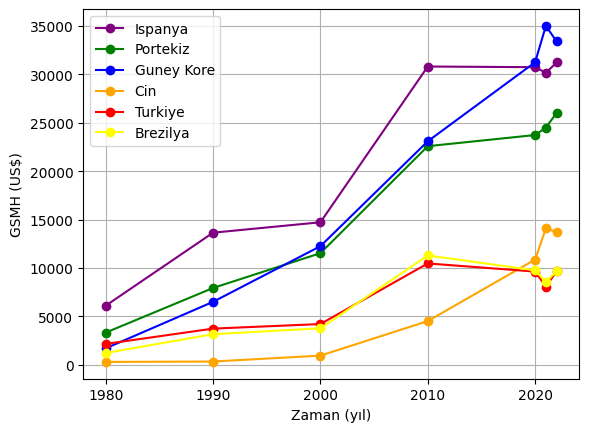

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
renkler = ['purple','green','blue','orange','red','yellow']
# yillara karsilik GSMH degisimini dogrudan cizdirebilmek icin
# oncelikle vericercevesinin transpozu alinmalidir.
gsmh.transpose().plot(kind="line",
                      color=renkler,
                      marker="o")
plt.grid(True)
plt.xlabel('Zaman (yıl)')
plt.ylabel('GSMH (US\$)')
plt.legend(loc='upper left')
plt.show()

Sosyal bilimci olmamakla birlikte ele alınan tüm ulkelerin 2000 ile 2010 arasında kişi başına düşen milli gelirlerini arttırdıkları, 1980'lerde Türkiye'nin gerisindeki Çin ve Güney Kore'nin Türkiye'yi geçtiği, İspanya ve Portekiz'in Avrupa Birliği üyesi ülke oluşlarını takiben ulusal gelirlerini hızla arttırdıkları ancak 2010'lar sonrası bu artışın yavaşladığı, Brezilaya ile Türkiye'nin benzer bir çizgi izlediği, Güney Kore'nin ise bilime yaptığı yatırımın sürekli bir artışla gelirlerini tüm bu ülkeleri geçecek duruma getirdiği görülmektedir. 

Yukarıdaki gibi bir tablodansa bu grafiklere bakarak zamanla değişimi görmek ve başka ülkelerinki ile karşılaştırmak çok daha kolaydır. Bir grafik, bir tablodan veya yukarıdaki gibi bir paragraf yazadan çok daha fazlasını çok kısa daha kısa sürede, özellikle grafik yorumlamak konusunda eğitimli insanların kolayca anlayacağı şekilde anlatır. 

Veri görselleştirmenin çok güzel bir örneğini alanın devlerinden Hans Rosling'in [4 dakikada 200 ülkenin 200 yıldaki gelişimi](https://www.youtube.com/watch?v=jbkSRLYSojo) videosunda bulabilirsiniz.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

# Veri Görselleştirme Paketleri

<b>İstatistiksel Bilgi Veren Görselleştirme Uygulamaları</b>: Dağılım grafikleri (ing. scatter plots) ya da eğri uyumlama gibi uygulamaları destekleyen paketlerdir.

* `matplotlib`: Python'da statik, hareketli ya da interaktif görselleştirmeler oluşturmak için kapsamlı bir kütüphanedir. John D. Hunter tarafından 2003 yılında EKG diyagramlarını görselleştirmek ve <i>Matlab</i> ortamındakine benzer grafikler oluşturmak için yazılmış, pek çok gönüllü programcının katkılarıyla geliştirilerek bugünkü yaygınlığını sağlayan başarımına erişmiştir.

* `seaborn`: `matplotlib` üzerine inşa edilmiştir. Renk paletleri ve çizim estetiği veri setlerindeki özellikle istatistiksel bilgileri sunabilmek üzere geliştirilmiştir.

<b>Grafikle Görselleştirmenin Gramerine Yönelik Uygulamalar:</b> `matplotlib` arayüzünün çok ayrıntılı bulunması durumunda `R` programlama dilinin `ggplot2` görselleştirme paketini temel alan paketler gibi uygulamalar kullanılabilir.

* `ggplot`: `matplotlib` 'a dayanır ve ona benzer bir işlevsellik sağlar ancak farklı ve daha kolay bir arayüz sağlar.

* `altair`: `ggplot` ile karşılaştırıldığında daha da basit bir arayüze sahiptir ve`jupyter` not defterlerine kolayca yerleştirilebilen veya PNG olarak dışa aktarılabilen Javascript tabanlı grafikler oluşturur.

<b>İnteraktif Görselleştirme Uygulamaları:</b>: zoom, pan, veri noktalarını interaktif etiketleme gibi özellikler sağlayan, aynı zamanda bir web sayfasında bağımsız çalışmak için Javascript olarak dışa aktarılabilen grafik uygulamalar sunan paketlerdir.

* `bokeh`: Anaconda paketinin üreticisi Continuum Analytics şirketinin görselleştirme paketidir ve özellikle internette sunmak üzere interaktif görselleştirme ve infografik uygulamaları geliştirmenizi sağlar. Kullanıcı arayüzünden veya seri veri güncellemelerinden ve stream'lerden gelen olaylara yanıt vermeyi sağlayan ayrı bir Python süreci başlatmak için bir da grafik sunucu (bokeh plot server) desteği bulunmaktadır. Bir örnek uygulama için [bkz.](https://ozgur.astrotux.org/ttv/basturk2022a/)

* `plotly`: görselleştirmelerinizi depolayabileceğiniz ve paylaşabileceğiniz bir kütüphane ve bulut hizmetidir (ücretsiz / ücretli hesapları vardır)

<b>İnteraktif Harita Uygulamaları</b>: renkli ve interaktif özelliklerde haritalar yaratmanıza olanak sağlarlar.

* `folium`: Verileri haritaların üstünde görüntülemek için $Leaflet.js$ javascript çizim kütüphanesine bağlı HTML sayfaları oluşturur. 

* `plotly`: jupyter not defterlerine gömülü renk kodlu ülke / dünya haritalarını da destekler.

<b>Üç Boyutlu (3D) Görselleştirme Uygulamaları</b>: 

* `mplot3d`: `matplotlib` 'in 3-boyutlu görselleştirme uygulamalarına platform sağlayan paketidir.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Matplotlib Kütüphanesi ##

Bu derste `matplotlib` altyapısını kullanan ve `pandas` veriçerçeveleri üzerinde tanımlı `plot` fonksiyonu sıklıkla kullanılacaktır. Ancak grafik parametrelerini tanımlamak ve özellikleri üzerinde daha geniş kontrole sahip olabilmek için kütüphanenin diğer fonksiyonlarından da yararlanılacaktır.  Bu nedenle `matplotlib` kütüphanesinin yapısından ve mimarisinden kısaca bahsetmekte fayda vardır. Daha geniş bilgi için `matplotlib` [dokümantasyonun](https://matplotlib.org/stable/index.html) incelenmesi ve gerektiğnde [dış kaynaklara](https://matplotlib.org/stable/users/resources/index.html) başvurulması önerilir. 

`matplotlib`, kodlama katmanı (<i>scripting layer</i>), grafik nesnneleri katmanı (<i>artist layer</i>) ve arkayüz katmanı (<i>backend layer</i>) adı verilen üç katmandan oluşmaktadır. 

<center>
    <img src="images/matplotlib_architecture.png", width="50%", height="50%">
</center>

### Arkayüz (Backend) Katmanı

Arkayüz, bilgisayarda grafik çizimi amaçlı daha düşük düzey, `wxPython` gibi araçlar veya `PostScript` gibi çizim dilleriyle iletişim kurarak arka plandaki işleri yerine getirir. Kütüphanenin temeli olup, en komplike işlerin yapıldığı katmandır. Üç ana bileşenden oluşur

* FigureCanvas — `matplotlib.backend_bases.FigureCanvasBase` Şeklin tuvale (ing. canvas) aktarıldığı nesne ve metotlardan oluşan arabirimidir.

* Renderer —` matplotlib.backend_bases.RendererBase` Çizim ve aktarım (rendering) işlemlerinin yapıldığı nesne ve metotlardan oluşan arabirimdir. `FigureCanvas` 'a şeklin aktarılmasından sorumludur.

* Event — `matplotlib.backend_bases.Event` Klavye ve fare gibi çevre birim elemanlarından gelen girdileri alan ve yorumlayan nesne ve metotlardan oluşan arabirimdir.

Çoğu grafik çiziminde (ve bu ders boyunca) kullanıcının arkayüzle ilgilenmesine hiç gerek olmamaktadır. Ancak `matplotlib` altyapısına dayalı bir grafik çizim uygulaması programlanmak istendiğinde arkayüz hakimiyeti gerekecektir.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

### Grafik Nesneleri (Artist) Katmanı

Tıpkı bir sanatçının tuval üzerine yaptığı ince ayarlar gibi, kullanıcının şekillerin mümkün olduğunca çok özelliğini kontrol etmesine ve ince ayar yapmasına olanak sağlayan nesne ve metotlardan oluşan katmandır. Bu katman, "tuval" (ing. canvas) üzerine çizim yapmak için `Renderer` arabirimini kullanan `Artist` adlı bir ana nesneden oluşur. Birden fazla şekil ya da eksen kullanılırken, her bir alt grafik (<i>subplot</i>) bir `Artist` nesnesine atandığından hangisinin aktif olduğu konusunda bir karışıklık oluşulmasının önüne geçilmiş olunur. Bu ana nesne ve altındaki grafik nesnelerinin yönetimine dayalı olduğu için <i>nesne yönelimli grafik çizimi</i> olarak da adlandırılır. Bir `matplotlib` figürünün üzerindeki başlık (<i>title</i>, <i>sembol</i>, <i>çizgi</i> ve <i>eksen</i> gibi her bir özellik bir nesne ile tanımlanır. 

İki tür `Artist` nesnesi vardır. 

* Primitive: Line2D, Rectangle, Circle ve Text gibi temel tür nesneler, 

* Composite: Axis, Ticks, Figure gibi kompozit nesneler. Bu nesneler temel nesneler ya da diğer kompozit nesnelerin bileşiminden oluşurlar.

Bir üst katman olan <i>kodlama katmanına</i> kıyasla daha fazla özelleştirme yapma olanağı sağlar ve gelişmiş grafikler üretmek üzere grafik nesneleri üzerinde tam kontrole ihtiyaç duyulan durumlar için daha uygundur.  Grafiklerin üretileceği bir web uygulaması ya da kullanıcı arayüzü geliştirmek için de sıklıkla başvurulur.

Grafik nesneleri katmanı hakkında daha fazla bilgi için `maplotlib` <i>Artist Tutorial</i> [dokümantasyonunu](https://matplotlib.org/stable/tutorials/intermediate/artists.html) incelemeniz önerilir.

<b>Örnek: </b> $\mu = 0$, $\sigma = 1$ ile tanımlanan standart normal dağılımdan rastgele seçilmiş 10000 örnekten oluşan normal dağılım örnekleminin grafik nesneleri katmanı düzeyinde histogramının çizimine bir örnek aşağıdaki kodla verilmiştir.

In [3]:
# Arkayuz (backend) nesnesi tuvale (canvas) sekil cizdirmek uzere 
# Grafik nesneleri katmani nesnesi FigureCanvas import edilir
# Arkayuzden import edilen FigureCanvasAgg "anti grain geometry" adli kutuphanenin
# tuval nesnesi olup, estetik olarak etkileyici sekiller icin gerekli ayarlara sahiptir
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Figure nesnnesi import edilir
from matplotlib.figure import Figure

# rastgele dagilimi olusturmak ve sayi dizilerinin kontrolu icin numpy
import numpy as np

fig = Figure()
canvas = FigureCanvas(fig)

# mu = 0, sigma = 1 standart normal dagilimdan 10000 buyukugundeki orneklem
x = np.random.randn(10000)

# figure nesnesine otomatik olarak eklenen axes artist nesnesinin olusturulmasi
# 1 satir 1 sutunda 1. seklin eksen nesnesi
ax = fig.add_subplot(111)

# 50 kutucuktan olusan histogramin cizdirilmesi
ax.hist(x, bins=50)

# Baslik ve eksen etiketleri
ax.set_title('Standart Normal Dagilimdan Rastgele Secilmis 10000 Sayinin Dagilimi')
ax.set_xlabel('x')
ax.set_ylabel('N')
fig.savefig('normal_daigilim.png')

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

### Kodlama (Scripting) Katmanı

Verisini çok fazla teknik detayla ilgilenmeden analiz etmek isteyenler için geliştirilmiş olan <b>kodlama katmanı</b> `matplotlib.pyplot` nesneleri aracılığı ile sağlanır. 

`matplotlib` mimarisinin en üst katmanıdır ve `MATLAB` betikleri şeklinde çalışmasını sağlamak için tasarlanmıştır. Kullanımı en kolay ve dolayısı ile en yaygın katmandır. Grafik Nesneleri Katmanı (<i>Artist layer</i>) nesne yönelimli grafik çizimi katmanı olarak adlandırıldığından, programcılıktaki yapıya benzer şekilde <i>yapısal çizim katmanı</i> (ing. procedural plotting) olarak da adlandırılır. Bir `FigureCanvas` nesnesinin oluşturulup `Figure` grafik nesnesiyle bağlanmasını otomatik olarak üstlenen `matplotlib.pyplot` paketi fonksiyon ve nesneleri üzerine kurulu olduğu için bu katman da özünde nesne yönelimlidir ancak kullanıcının bunun farkında olması gerekmez! 

<b>Örnek: </b> Grafik nesneleri katmanına örnek olarak verilen standart normal dağılımdan rastgele seçilen 10000 sayıdan oluşan örneklemin histogramının kodlama katmanında çizimi aşağıdaki kodla verilmiştir.

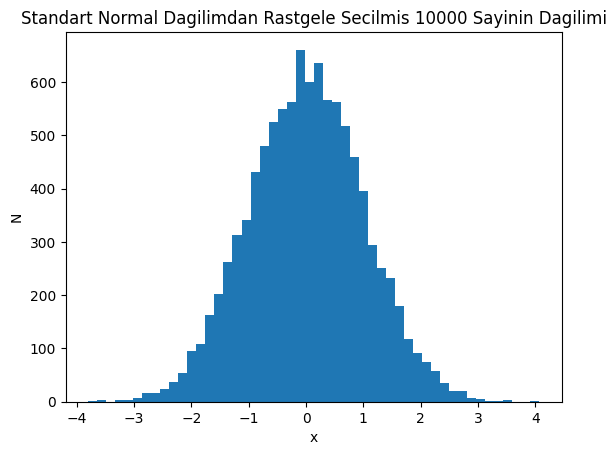

In [4]:
%matplotlib inline
# FigureCanvas nesnesinin otomatik olarak import edilisi
import matplotlib.pyplot as plt
# standart normal dagilim ve dizi islemleri icin numpy
import numpy as np

# standart normal dagilimin olusturulmasi
np.random.seed(123)
x = np.random.randn(10000)

# Histogramin cizimi
plt.hist(x, 50)
# Baslik ve eksen etiketleri
plt.title('Standart Normal Dagilimdan Rastgele Secilmis 10000 Sayinin Dagilimi')
plt.xlabel('x')
plt.ylabel('N')
#fig.savefig('normal_daigilim.png')
plt.show()

`matplotib` hakkında daha fazla bilgi, örnek ve tutorial formatındaki dokümanlar için [dokümantasyon sayfasını](https://matplotlib.org/), özellikle mimari hakkında daha detaylı bilgi için ise kütüphaneyi geliştiren John Hunter ve Michael Droettboom'ın [yazısını](https://www.aosabook.org/en/matplotlib.html) okumakta fayda vardır.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

### Matplotlib ve Jupyter Defterleri

`jupyter notebook` defterlerinde `matplotlib` grafiklerini görüntülemek için farklı modlar bulunmaktadır. Bu modlar jupyter sihirli kelimeleri (<i>magic words</i>) kullanılarak aktif hale getirilebilir.

* `%matplotlib inline` interaktif kullanım araçları olmaksızın grafiğin ekrana getirilmesini sağlar.

* `%matplotlib notebook` grafikler üzerinde <i>zoom</i>, <i>pan</i> gibi interaktif işlevlerin uygulanabilmesine olanak sağlayan moddur. <b>Uyarı</b>: Oluşturulan grafiğin sağ üstünde yer alan ve etkileşimi sonlandıran butonun tıklanmaması durumunda bir sonraki grafik interaktif olarak çalışmayabilir ve hata verebilir. Bu tür hataları önlemek için `matplotlib.pyplot` paketinin modun jupyter sihirli kelimesi ile (iki kez) aktif hale getirilmesi sonrası (daha önce edilmemişse) import edilmesi gerekebilmektedir.

Aslında bu `jupyter` "sihirli kelimeleri" `matplotlib` arkayüzünü (backend) değiştirmektedir. Arkayüzler hakkında daha fazla bilgi için [bkz.](https://matplotlib.org/3.5.0/users/explain/backends.html). `%matplotlib widget`, `%matplotlib ipympl` ile aktif hale getirilebilecek diğer arkayüzler ve `mpld3` gibi interaktif kullanım sağlayan başka kütüphaneler de bulunmaktadır. Ancak en sık kullanılan arkayüzler (ya da modlar) `inline` ve `notebook` burada örneklenmiştir.

<IPython.core.display.Javascript object>


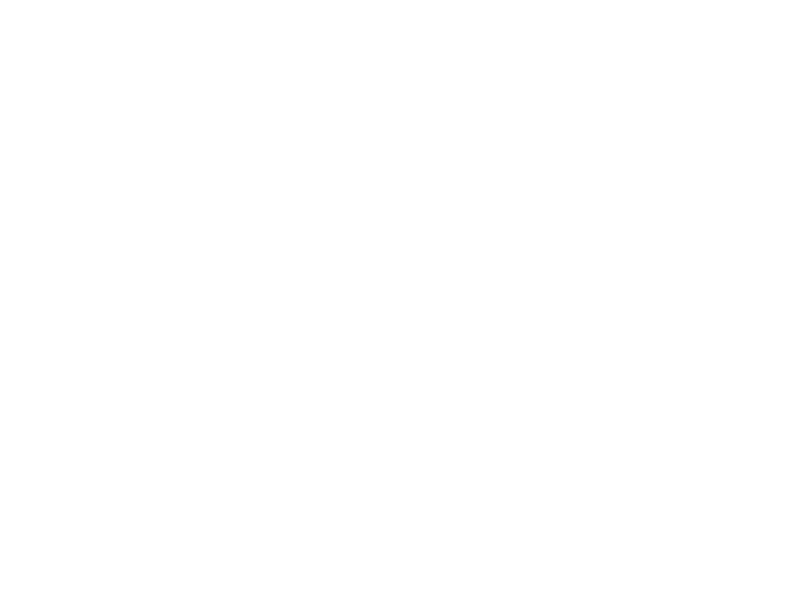

In [5]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
# Histogramin cizimi
plt.hist(x, 25)
# Baslik ve eksen etiketleri
plt.title('Standart Normal Dagilim')
plt.xlabel('x')
plt.ylabel('N')
plt.show()

Sistemde yüklü `matplotlib` versiyonunu ve hazır grafik stillerini görmek için

In [6]:
import matplotlib as mpl
mpl.__version__

'3.5.3'

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

# Veri Görselleştirme Türleri #

## Eğri Grafikleri ##

<b>Eğri grafiği</b> veya <b>çizgi grafiği <i>(ing. line plot)</i></b>, veri noktalarının doğru parçalarıyla birbirine bağlandıkları temel bir grafik türüdür. Verinin içinde yer alan belirli bir zaman aralığındaki trendlerin görselleştirme sonucu belirlenebilmesi ve farklı gruplardaki trendlerin karşılaştırılması için uygun bir grafik türüdür. 

### Örnek: Keşif Tekniklerinin Performanslarının Zamanla Değişimi

Örnek olarak [exoplanet.eu](http://exoplanet.eu/catalog/) kataloğundaki verileri keşif tekniklerine göre grupladıktan her bir teknikle yapılan keşif sayılarıının zamanla değişimi incelenmek ve karşılaştırılmak isteniyor olsun.

Bu amaçla öncelikle verinin görselleştirme için hazırlanması gerekir.

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
exoeu = pd.read_csv("veri/exoplanet.eu_catalog_20230502.csv")
exoeu.columns

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im

Ötegezegenlerin keşif yöntemleri `detection_type`, tarihleri ise `discovered` anahtarında bulunmaktadır. Sadece bu bilgilerle ilgilenildği için onları kullanarak gruplamalar ve veriçerçeveleri oluşturmak iyi bir fikir olacaktır.

In [9]:
exoeu.groupby('discovered')['detection_type'].describe()

count unique              top  freq
discovered                                    
1992.0         3      1           Timing     3
1995.0         3      2          Imaging     2
1996.0         7      2  Radial Velocity     6
1998.0         8      2  Radial Velocity     7
1999.0        15      2  Radial Velocity    12
2000.0        24      3  Radial Velocity    19
2001.0        15      3  Radial Velocity    13
2002.0        31      5  Radial Velocity    27
2003.0        28      4  Radial Velocity    24
2004.0        35      4  Radial Velocity    23
2005.0        35      5  Radial Velocity    26
2006.0        39      4  Radial Velocity    27
2007.0        63      5  Radial Velocity    38
2008.0        67      7  Radial Velocity    31
2009.0        90      4  Radial Velocity    66
2010.0       136      7  Radial Velocity    63
2011.0       206      7  Primary Transit    96
2012.0       146      7  Primary Transit    87
2013.0       184      7  Primary Transit   112
2014.0       870      6  Primary Transit   790
2015.0       170      6  Primary Transit   108
2016.0      1536      8  Primary Transit  1444
2017.0       219      7  Primary Transit   133
2018.0       361      6  Primary Transit   273
2019.0       229      8  Primary Transit   125
2020.0       244      8  Primary Transit   164
2021.0       216      7  Primary Transit    94
2022.0       324      8  Primary Transit   169
2023.0        53      4  Primary Transit    29

Görüldüğü gibi keşif sayılarını 2010'a kadar dikine hız domine ederken, Kepler Uzay Teleskobu'nun gözlemlere başlayarak geçiş yöntemiyle gezegen keşfetmeye başlamasıyla birlikte geçiş yöntemi 2010 sonrasını domine etmiştir.

Tüm keşif yöntemlerinin toplam keşif sayılarına bakıldığında bu iki yöntemle diğer tüm yöntemlere göre daha fazla sayıda keşif yapıldığı açıktır. Bu nedenle eğri grafiği üzerinde bir karşılaştırmayı öncelikle sadece bu iki yöntemi dikkate alarak yapmak faydalı olacaktır.

In [10]:
exoeu.groupby("detection_type")['# name'].count()

detection_type
Astrometry           20
Default              32
Imaging             218
Microlensing        238
Primary Transit    3751
Radial Velocity    1033
TTV                  26
Timing               48
Name: # name, dtype: int64

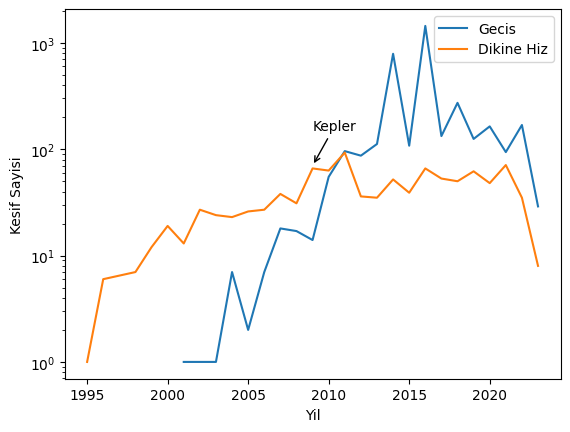

In [11]:
transits = exoeu[exoeu['detection_type'] == 'Primary Transit']
transits.groupby('discovered').count()['# name'].plot(kind="line",
                                                    label="Gecis")
radvel = exoeu[exoeu['detection_type'] == 'Radial Velocity']
radvel.groupby('discovered').count()['# name'].plot(kind="line",
                                                       label="Dikine Hiz")

# Kepler'in gozlemlere basladigi yili isaretlemek iyi bir fikir olacaktir
plt.annotate("Kepler",
            xy=(2009, 70), xycoords='data',
            xytext=(2009, 150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.yscale("log")
plt.xlabel("Yil")
plt.ylabel("Kesif Sayisi")
plt.legend(loc="best")
plt.show()

y-ekseninin logaritmik ölçekte çizdirilmesinin nedeni, geçişle keşiflerin bazı yıllarda çok yüksek sayılara ulaşmalarıdır. Bu yıllar Kepler verisinden en çok gezegenin keşfedildiği yıllardır.

Benzer bir grafik keşif sayıları yakın <i>Kütleçekim Mercekleme</i> ve <i>Doğrudan Görüntüleme</i> teknikleri için de yapılabilir. Bu kez y-eksenini logaritmik çizdirmeye de ihtiyaç duyulmayacaktır.

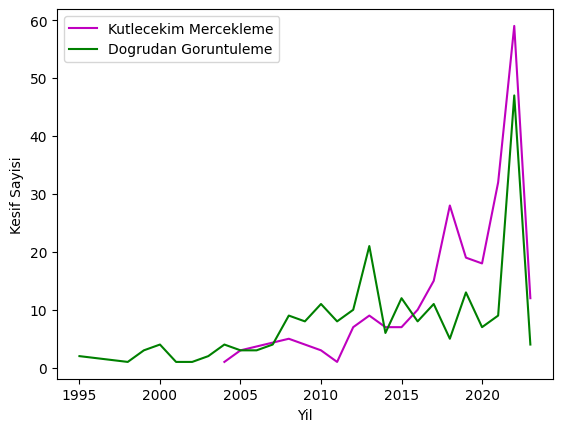

In [12]:
microlensing = exoeu[exoeu['detection_type'] == 'Microlensing']
microlensing.groupby('discovered').count()['# name'].plot(kind="line",
                                                          color="m",
                                                    label="Kutlecekim Mercekleme")
imaging = exoeu[exoeu['detection_type'] == 'Imaging']
imaging.groupby('discovered').count()['# name'].plot(kind="line",
                                                     color="g",
                                                       label="Dogrudan Goruntuleme")
plt.xlabel("Yil")
plt.ylabel("Kesif Sayisi")
plt.legend(loc="best")
plt.show()

Doğrudan görüntülemeyle keşiflerin 2020 sonrası büyük bir ivmeyle arttığı görülmektedir. 2023 yılı sonunda bu grafiğin ne şekilde değiştiğini incelemek ilginç olacaktır. 2027 Mayıs'ında uzaya gönderilmesi planlanan [Nancy Grace Roman Teleskobu'yla](https://en.wikipedia.org/wiki/Nancy_Grace_Roman_Space_Telescope) alınan verilerin inclenmesi sonrası bu grafiğin y-eksenini de logaritmik ölçekte çizdirmek gerekebilecektir. 

Son olarak toplam keşif sayılarının zamanla değişimine bakmak istenebilir.

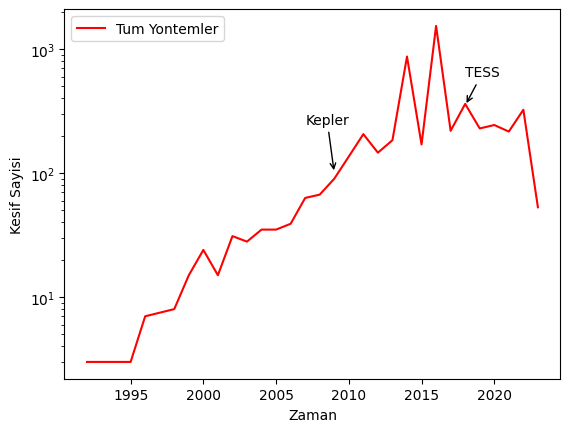

In [13]:
exoeu.groupby('discovered').count()['# name'].plot(kind="line", label="Tum Yontemler", color="r")
plt.yscale("log")
# Kepler'in gozlemlere basladigi yil
plt.annotate("Kepler",
            xy=(2009, 100), xycoords='data',
            xytext=(2007, 250), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
# TESS'in gozlemlere basladigi yil
plt.annotate("TESS",
            xy=(2018, 350), xycoords='data',
            xytext=(2018, 600), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.xlabel("Zaman")
plt.ylabel("Kesif Sayisi")
plt.legend(loc="best")
plt.show()

2023 yılında gezegen keşiflerinin yapılmış olduğu, ancak henüz 4 aydan kısa bir süre geçmiş olduğu değerlendirilmelidir.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Alan Grafikleri ##

Alan grafikleri, özelikle aralarında ast-üst ilişkisi bulunan değişkenlerin çoğu durumda zamanla değişimlerinin kümülatif olarak gösterildiği grafiklerdir. 

Örnek olarak geçişle keşiflerin tüm keşiflerin ne kadarını oluşturduğu ve göreli bu durumun zamanla nasıl değiştiği eğri grafiklerinin altındaki alanlar doldurularak alan grafiğiyle anlatılabilir. 

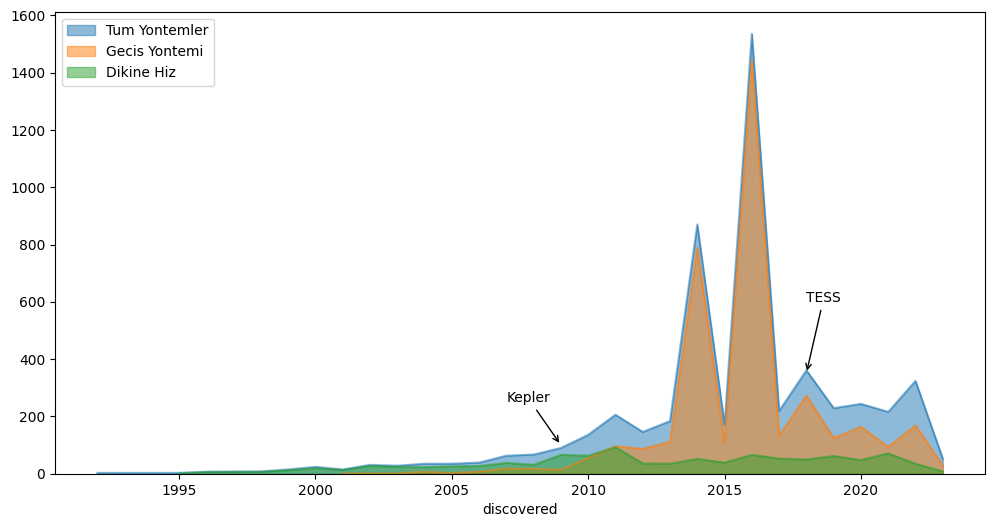

In [14]:
plt.figure(figsize=(12,6))
exoeu.groupby('discovered').count()['# name'].plot(kind="area", 
                                                   stacked=False,
                                                   alpha=0.5,
                                                   label="Tum Yontemler")
transits.groupby('discovered').count()['# name'].plot(kind="area", 
                                                   stacked=False,
                                                    alpha=0.5,
                                                   label="Gecis Yontemi")
radvel.groupby('discovered').count()['# name'].plot(kind="area", 
                                                   stacked=True,
                                                    alpha=0.5,
                                                   label="Dikine Hiz")
#plt.yscale("log")
# Kepler'in gozlemlere basladigi yil
plt.annotate("Kepler",
            xy=(2009, 100), xycoords='data',
            xytext=(2007, 250), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
# TESS'in gozlemlere basladigi yil
plt.annotate("TESS",
            xy=(2018, 350), xycoords='data',
            xytext=(2018, 600), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.legend(loc="upper left")
plt.show()

Bu grafiğe bakarak toplam keşiflerde 2013 ve 2016 yıllarında yaşanan artışların geçiş yöntemi, 2002 civarındaki artışın ise dikine hız yöntemi kaynaklı olduğunu söylemek mümkündür. 

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Histogramlar ##

Histogramlar, sayısal verilerin *frekans* dağılımlarını temsil etmek için kullanılır. *x* ekseni sınırları belli kutucuklara (bin) bölünerek, her veri noktası değeri itibarı ile uç noktaları arasında bulundğu kutucuğa atanır. Her kutunun y-ekseni değeri o kutudaki verilerin sayısı (frekans) ya da olasılık kütle / yoğunluk fonksiyonu değeridir. Kutu boyutları görselleştirmenin etksini artırmak ve bir aralığı ön plana çıkarmak üzere değiştirilebilir. 

### Örnek: Geçiş Yapan Ötegezegenlerin Yarıçap Dağılımı

Daha önce koşullu indeksleme yöntemiyle oluşturulan `transits` veriçerçevesinde gezegen yarıçapını gösteren `radius` parametresinin dağılımı örnek olarak incelenebilir. Geçiş yöntemi, yıldız yarıçapının düşük ve yüksek çözünürlüklü tayflar, tayfsal enerji dağılımı ve yıldız evrim modellerinden belirlenebilmesi durumunda gezegen yarıçapını doğrudan verir. Bu nedenle veriçerçevesinin sadece geçiş yapan gezegenlere sınırlanması durumunda bu gezegenlerin hepsinin yarıçap değerinin belirlenmiş olması gerekir. Ancak bundan emin olunamayacağı için öncelikle bir kontrol etmekte fayda vardır.

In [15]:
transits[pd.isna(transits['radius'])]['# name']

11                              1SWASP J1407 b
84                                    38 Vir b
452                                 HAT-P-44 c
455                                 HAT-P-46 c
586                                 HD 10442 b
1197                                HD 75784 b
1198                                HD 75784 c
1390                                   J1433 b
1834                             KIC 9413313 b
1883    KMT-2019-BLG-1806/OGLE-2019-BLG-1250 b
1922                                 KOI-142 c
2672                             Kepler-1520 b
2854                        Kepler-1661 (AB) b
4701                         SDSS J1411+2009 b
4707                                   SOI-3 b
4708                                   SOI-4 b
4709                                   SOI-5 b
4710                                   SOI-6 b
4712                                   SOI-8 b
4721                          TIC 156514476.01
4840                                 TOI-203 b
4995         

Görüldüğü üzere 26 gezegenin yarıçapları `exoplanet.eu` veritabanında yer almamaktadır. Bu gezegenlerin yarıçapları [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS) gibi diğer veritabanlarında araştırılabileceği gibi literatürde bu gezegenlere ilişkin yayınlarda bulunup eklenebilir de. Ancak yeterli sayıda örnek olduğu için bu gezegenler ilgili verçeçevesiden çıkarılarak devam edilebilir.

In [16]:
transits_rad = transits.dropna(subset=['radius'])

`numpy.histogram` fonksiyonu `matplotlib.pyplot.histogram` gibi veriyi aksi söylenmedikçe 10 kutucuğa ayırarak bu kutucukların sınırlarını ve sayılarını döndürür. Öncelikle histogramın bu parametrelerini listeledikten sonra dağılımın grafiğine bakmakta fayda vardır.

In [17]:
transits_rad['radius']

35      1.57000
36      1.57000
95      0.17370
111     1.02000
116     0.45710
         ...   
5313    0.54000
5314    0.44000
5315    0.68000
5316    0.49000
5351    0.16719
Name: radius, Length: 3725, dtype: float64

In [18]:
# np.histogram returns 2 values
sayi,kutu_sinirlari = np.histogram(transits_rad['radius'])

print(sayi) # herbir kutuya dusen gezegen sayisi
print(kutu_sinirlari) # kutularin (binlerin) sinirlari

[3122  578   19    3    0    1    0    0    1    1]
[0.02543  0.943847 1.862264 2.780681 3.699098 4.617515 5.535932 6.454349
 7.372766 8.291183 9.2096  ]


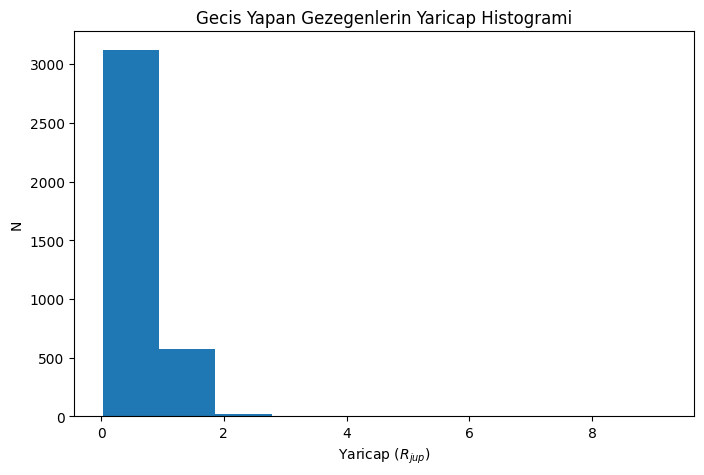

In [19]:
transits_rad['radius'].plot(kind='hist', figsize=(8, 5))

plt.title('Gecis Yapan Gezegenlerin Yaricap Histogrami')
plt.ylabel('N')
plt.xlabel("Yaricap ($R_{jup}$)")

plt.show()

Özellikle $[0.0-0.1]$ aralığındaki yığılma bu histogramın yorumlanmasını güçleştirmektedir. Bu nedenle bu veriyi ikiye bölmekte fayda var: $R \le 0.4 R_{jup}$ ve $R > 0.4 R_{jup}$ gibi küçük ve büyük gezegenleri birbirinden ayıran bir gruplama faydalı olabilir. Ayrıca küçük gezegenler için Jüpiter yarıçapı yerine Dünya yarıçapını kullanmak daha faydalı olacaktır. Bu amaçla `astropy.constants` öznitelikleri arasında yer alan `R_earth` ve `R_jup` değerlerinden faydalanılabilir.

In [20]:
from astropy import constants as const
R_earth_jup = const.R_jup / const.R_earth
transits_rad['Rearth'] = transits['radius']*R_earth_jup

/tmp/ipykernel_6896/2249128842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transits_rad['Rearth'] = transits['radius']*R_earth_jup


In [21]:
kucukgez = transits_rad[transits_rad['radius'] <= 0.4]
buyukgez = transits_rad[transits_rad['radius'] > 0.4]

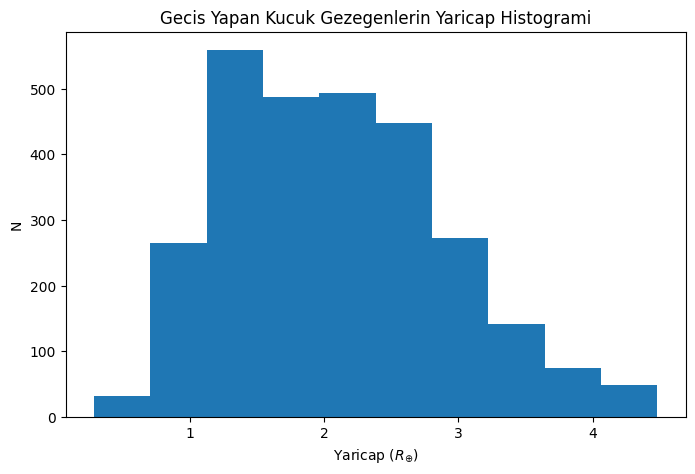

In [22]:
kucukgez['Rearth'].plot(kind='hist', figsize=(8, 5))

plt.title('Gecis Yapan Kucuk Gezegenlerin Yaricap Histogrami')
plt.ylabel('N')
plt.xlabel("Yaricap ($R_{\oplus}$)")

plt.show()

Bu histogram biraz daha sınırlanıp ($0.5 - 4.0 R_{\oplus}$), kutucuk sayısı arttırıldığında (25) küçük gezegenlerin birbiriyle kesişen biri $1.3 R_{\oplus}$, diğeri $2.2 R_{\oplus}$ civarında maksimuma ulaşan iki ayrı popülasyondan oluştukları görülmektedir. Gezegen sayısının görece az olduğu ve en "dip" noktası $1.8 R_{\oplus}$ civarında olan bu aralık literatürde <i>Yarıçap Vadisi</i> (ing. radius valley, [Radius gap](https://sites.astro.caltech.edu/~fdai/radius_gap.html), [Fulton gap](https://ui.adsabs.harvard.edu/abs/2017AJ....154..109F/abstract)) olarak bilinmektedir. Bu "vadinin" sol tarafında karasal gezegenler (süper-Dünyalar ve daha küçük gezegenler), sağ tarafında ise bir gaz zarfa sahip gezegenlerin (mini-Neptünler ve daha büyük gezegenler) bulunmaktadır. Bu ayrımın başlangıçta ince atmosfere sahip gezegenlerin genç-yıldızlarının ilk 100 milyon içinde enerjik X-ışın ve morötesi ışınlarıyla atmosferlerini tamamen kaybedip karasal birer çekirdek olarak kalırken, daha kalın atmosfere sahip olanların atmosferlerinin bir kısmını koruyabildikleri düşünülmektedir ([Owen ve Wu 2017](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1705.10810)). Alternatif bir açıklama çekirdeğin çok sıcak olduğu ilk zamanlarda da atmosferi kaçırabileceği üzerine kurulmuştur ([Ginzburg vd. 2017](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1708.01621)). [Hirano ve Dai (2017)](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1710.03239) tarafından bu iki açıklama üzerine yapılan bir araştırma için [bkz.](https://sites.astro.caltech.edu/~fdai/radius_gap.html). Her ne kadar ilk bulunduğunda bu aralık bir "boşluk" olarak isimlendirilmişse de sonradan bu aralıkta bulunan gezegenlerle birlikte giderek bir "vadiye" dönüştüğü görülmüştür. Ancak yine de bu aralık iki ayrı gezegen popülasyonunu birbirinden ayırıyor gibi görünmektedir.

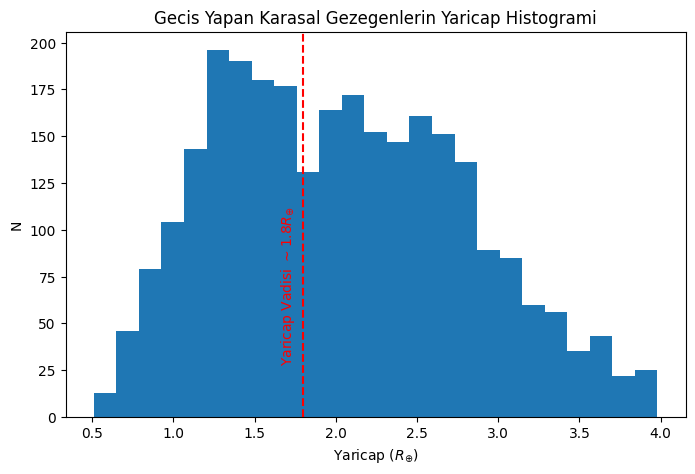

In [23]:
radvalley = kucukgez[(kucukgez['Rearth'] > 0.5) & (kucukgez['Rearth'] < 4.0)]
radvalley['Rearth'].plot(kind='hist', bins=25, figsize=(8, 5))
plt.axvline(x=1.8, ls="--", color="red")
# TESS'in gozlemlere basladigi yil
plt.annotate("Yaricap Vadisi $\sim 1.8 R_{\oplus}$",
            xy=(1.8, 175), xycoords='data',
            xytext=(1.65, 30), textcoords='data',rotation=90,
            color="red"
            )
plt.title('Gecis Yapan Karasal Gezegenlerin Yaricap Histogrami')
plt.ylabel('N')
plt.xlabel("Yaricap ($R_{\oplus}$)")
plt.show()

Son olarak geçiş yöntemiyle keşfedilmiş dev gezegenlerin yarıçap dağılımı aşağıdaki histogramla verilmiştir.

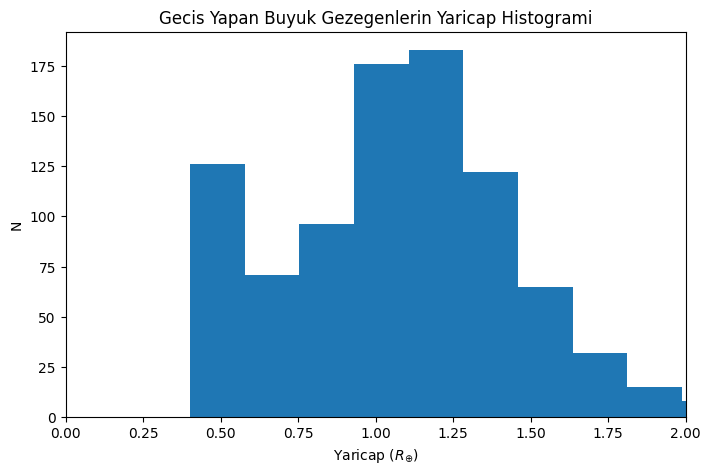

In [24]:
buyukgez['radius'].plot(kind='hist', bins=50, figsize=(8, 5))

plt.title('Gecis Yapan Buyuk Gezegenlerin Yaricap Histogrami')
plt.ylabel('N')
plt.xlabel("Yaricap ($R_{\oplus}$)")
plt.xlim(0,2.0)
plt.show()

Bu dağılımda da $0.75 R_{jup}$ civarında bir başka vadi görmek mümkündür. Ancak bu vadi kısa yörünge dönemli ($P < 2.2$ gün) gezegenlerin yörünge dönemlerine karşılık kütleleri çizdirildiğinde kendisini çok daha iyi ortaya koyan <i>Jüpiter-altı cisim çölü</i> (ing. sub-Jovian desert) ya da <i>sıcak-Neptün çölü</i> olarak bilinen parametre uzayından kaynaklanmaktadır.. Bu grafik <i>saçılma grafikleri</i> konusunda örnek olarak verilecektir.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Çubuk (Sütun) Grafikleri ##

Çubuk (sütün) grafikleri, özellikle kategorik veride her bir kategorinin ya da özelliğin gözlenme sıklığını karşılaştırmak için kullanılır. `maptlotlib` de bir çubuk grafiği yatay (`barh`) ya da daha sıklıkla dikey (`bar`) çubuklar (sütunlar) kullanılarak iki farklı yapıda oluşturulabilir.

### Örnek: Keşif Yöntemlerinin Birbirleri İle Karşılaştırılması ###

`exoplanet.eu` veritabanındaki ötegezegenlerin her bir keşif yöntemiyle ne kadarının keşfedildiğni karşılaştırarak performanslarını görselleştirmek için çubuk grafiklerinden yararlanılabilir. 

In [25]:
yontemler = exoeu.groupby("detection_type")['detection_type'].count()
yontemler

detection_type
Astrometry           20
Default              32
Imaging             218
Microlensing        238
Primary Transit    3751
Radial Velocity    1033
TTV                  26
Timing               48
Name: detection_type, dtype: int64

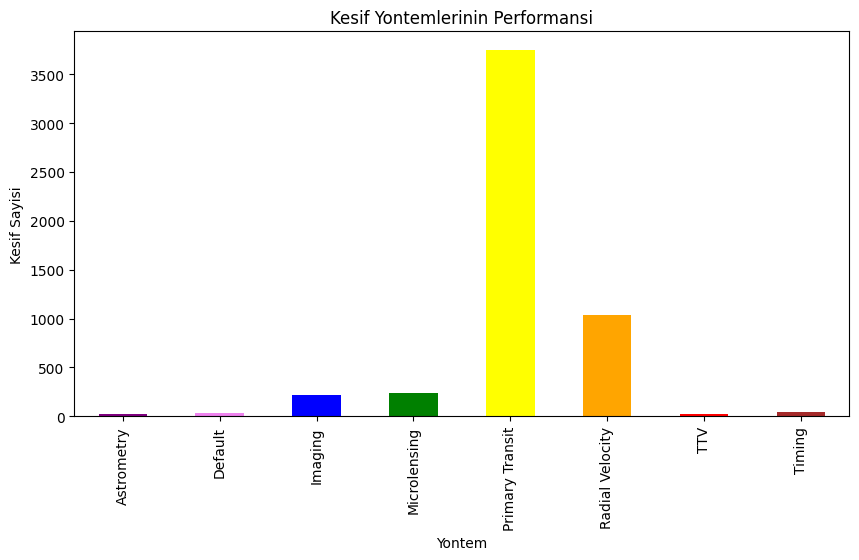

In [26]:
plt.figure(figsize=(10,5))
renkler = ["purple","violet","blue","green","yellow","orange","red","brown"]
yontemler.plot(kind="bar", color=renkler)
plt.title("Kesif Yontemlerinin Performansi")
plt.xlabel("Yontem")
plt.ylabel("Kesif Sayisi")
plt.show()

Bir `matplotlib` stili de kullanarak bu grafiği yatay bir çubuk grafiği ile keşifleri performanslarına göre sıralayarak ve yüzde kaçının o yöntemle yapıldığını da çubukların üzerine yazarak görselleştirmek daha bilgi verici olabilir. 

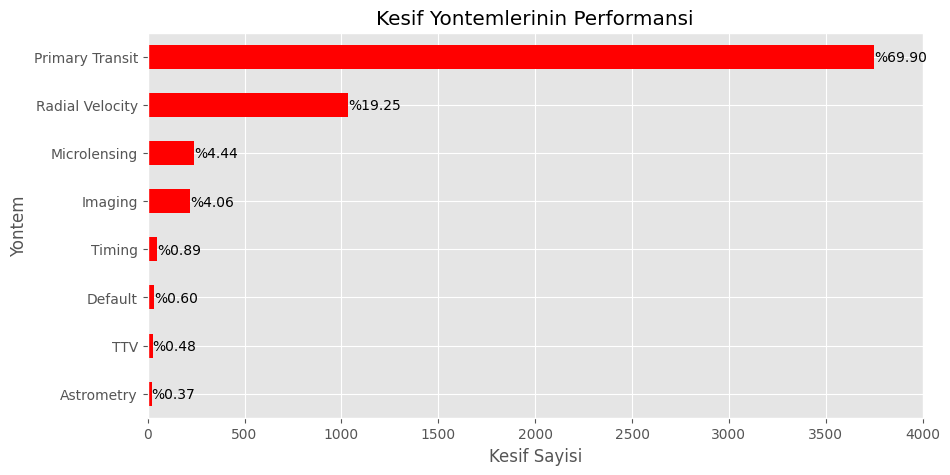

In [27]:
import matplotlib as mpl
mpl.style.use('ggplot')  # ggplot-stili
plt.figure(figsize=(10,5))
yontemler.sort_values().plot(kind="barh", color="red")
for i,sayi in enumerate(yontemler.sort_values()): 
    label = "%{:.2f}".format(sayi/exoeu.shape[0]*100)
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(sayi, i-0.1), color='black')
plt.title("Kesif Yontemlerinin Performansi")
plt.xlabel("Kesif Sayisi")
plt.ylabel("Yontem")
plt.xlim((0,4000))
plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Pasta Grafikleri ##

Bir "pasta grafiği", bir daireyi (veya pastayı) orantılı dilimlere bölerek kategoriler arası sayısal oranları karşılaştırmalı olarak görselleştiren dairesel bir grafiktir. Medyada yaygın olarak kullanıldığı iyi bilinen bir tür olan pasta grafikleri `matplotlib` de `kind=pie` parametresi çizdirilir.

Bir önceki örnekte verilen ötegezegen keşif yöntemleri arası performans karşılaştırmasını bir de pasta grafiği ile görselleştirerek yapmak faydalı olacaktır.

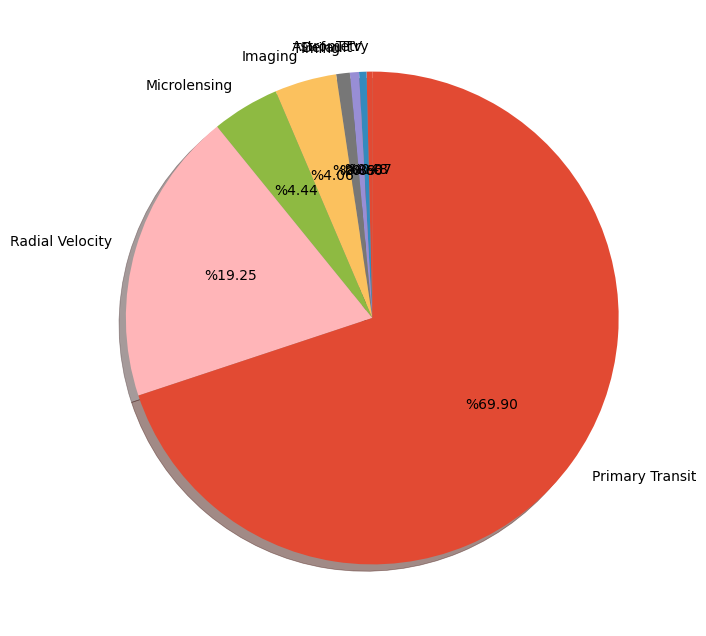

In [28]:
# yine yontemleri basarisina gore siralamak iyi bir fikirdir
yontemler.sort_values().plot(kind='pie',
               figsize=(12, 8),
               autopct='%%%1.2f', # yuzde isaretini kullan
               startangle=90,     # 90 dereceden baslayip terse git
               shadow=True,       # add shadow 
              )
# y-ekseni gosterme
plt.ylabel(None)
plt.show()

Görüldüğü gibi bazı yöntemlerde az sayıda keşif olduğu için birbirleriyle karışabilmektedir. Bunu önlemek için bir miktar görselleştirme iyileştirmesine ihtiyaç duyulur.

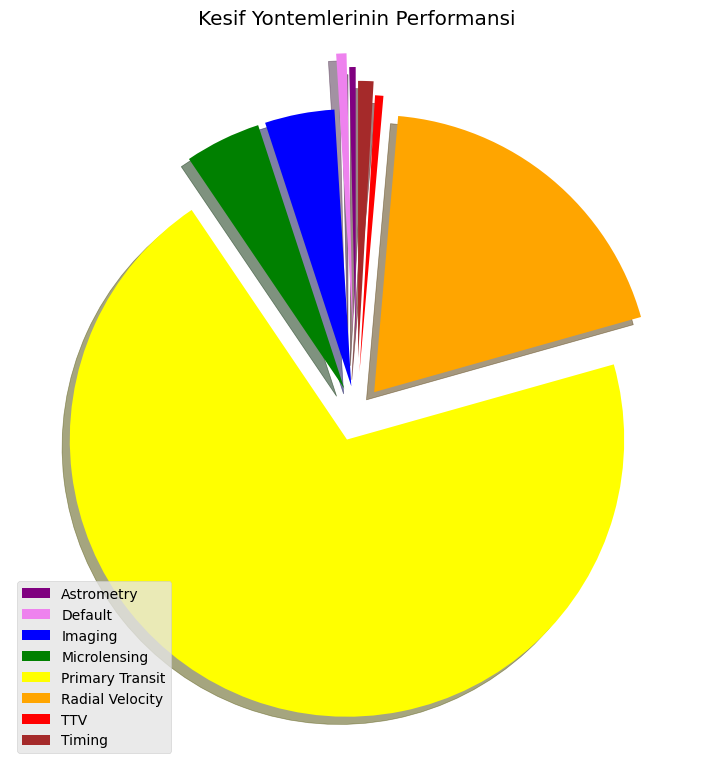

In [29]:
rengler = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'turquoise', 'cyan']
kenarlik = [0.25, 0.3, 0.1, 0.1, 0.1, 0.1, 0.15, 0.2] # ortadan uzaklastirma miktarlari

yontemler.plot(kind='pie',
                            figsize=(15, 9),
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=renkler,  # renklendir
                            explode=kenarlik # 'ortadan verilen miktar kadar uzaklastir
                            )

# basligi biraz yukari al
plt.title('Kesif Yontemlerinin Performansi', y=1.05) 

plt.ylabel(None)

#plt.axis('equal') 

# legend ekle
plt.legend(labels=yontemler.index, loc='lower left') 

plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Kutu Diyagramları ##

[<i>Kutu diyagramları (ing. box plots)</i>](http://ozgur.astrotux.org/ast416/Ders_01/Ders01_Hata_Analizi.html#Kutu-Grafikleri) Bütün veriyi dört çeyreğe ayırarak ve ortaya ortanca değeri (medyan) getirerek bir dağılımın hem görselleştirilmesine hem de veri setindeki aykırı noktaların görülebilmesine (ve gerektiğinde ayıklanabilmesine) olanak veren grafiklerdir. İlk çeyreğin sonunu gösteren Q1 değeri ile son çeyreğin başını gösteren Q3 arasındaki uzaklık, <i>çeyrekler arası uzaklık (ing. Inter-Quartile Range, IQR)</i> olarak tanımlanır. Kutu diyagramının her iki taraftan sınırı Q1 ve Q3'e, 1.5 x IQR kadar uzaklıktadır ve buralar bir çizgi ile (whisker) gösterilir. <br>

<center>
    <img src="images/boxplot_scaled.png", width="50%", height="50%">
</center>

### Örnek: Dışmerkezlilik Aralıkları ###

Farklı keşif yöntemleri farklı dış merkezlilikteki gezegenlerin keşfedilmesine daha duyarlıdır. Örneğin geçiş yöntemi yıldızına yakın ve büyük gezegenleri keşfetmeye daha duyarl olduğundan aynı zamanda bu özellikleri nedeniyle yıldızıyla aralarındaki kuvvetli tedirginlik etkileşmeleri sonucu daha çembersel yörüngelere zorlanmış gezegenleri keşfetmek konusunda daha başarılıdır. Doğrudan görüntüleme yönteminde ise yöntemin teknik sınırları nedeniyle yıldızına uzak ve genç gezegenlerin keşfedilmesi daha kolaydır. Bu gezegenlerin yörünge dış merkezlilikleri de bu nedenle daha büyük olabilmektedir. Keşif yöntemlerine göre bu aralıklara bakmak ve karşılaştırmak çok iyi bir fikir olacaktır.

Öncelikle verileri analiz için tekrar hazırlamak gerekecektir.

In [30]:
# Daha once bu veri islendigi icin tekrar orjinal halini elde etmek gerekebilir
# Istatistiksel olarak anlamli sayida ornek barindiran 4 kesif yontemi
exoeu_ecc = exoeu.dropna(subset=['eccentricity'])
transits_ecc = exoeu_ecc[exoeu_ecc['detection_type'] == "Primary Transit"]
radvel_ecc = exoeu_ecc[exoeu_ecc['detection_type'] == "Radial Velocity"]
imaging_ecc = exoeu_ecc[(exoeu_ecc['detection_type'] == "Imaging") & exoeu_ecc['eccentricity'] < 1]
lensing_ecc = exoeu_ecc[exoeu_ecc['detection_type'] == "Microlensing"]

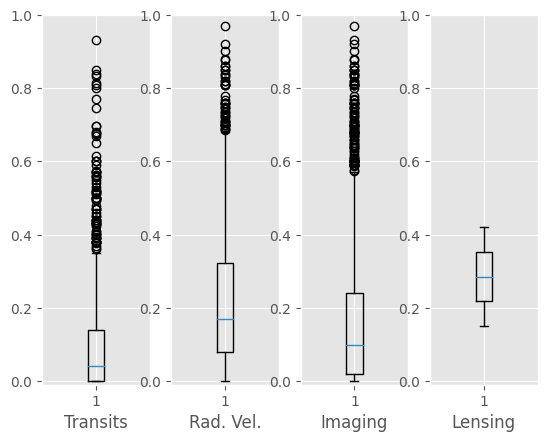

In [31]:
fig, ax = plt.subplots(1, 4)
ax[0].boxplot(transits_ecc['eccentricity'])
ax[0].set_xlabel("Transits")
ax[0].set_ylim((-0.01,1.0))
ax[1].boxplot(radvel_ecc['eccentricity'])
ax[1].set_xlabel("Rad. Vel.")
ax[1].set_ylim((-0.01,1.0))
ax[2].boxplot(imaging_ecc['eccentricity'])
ax[2].set_xlabel("Imaging")
ax[2].set_ylim((-0.01,1.0))
ax[3].boxplot(lensing_ecc['eccentricity'])
ax[3].set_xlabel("Lensing")
ax[3].set_ylim((-0.01,1.0))
plt.show()

Tüm kutu diyagramlarını tek bir grafik üzerinde göstermek için veriyi bir liste içine almak gerekir. Zira `numpy` dizilerinin ve `pandas` serilerinin bu şekilde birleştirilebilmesi için aynı uzunlukta olmaları gereklidir. Oysa listeler için böyle bir zorunluluk bulunmamaktadır.

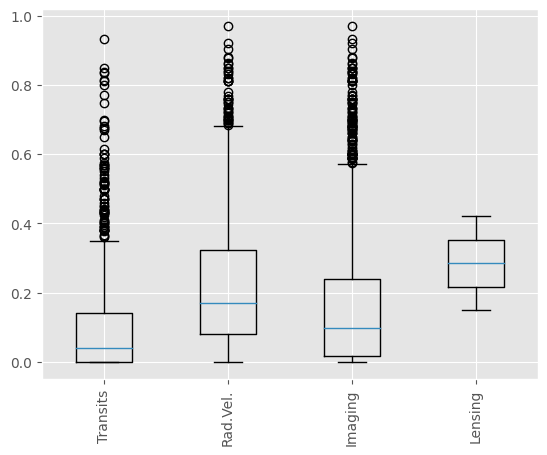

In [32]:
eccdist = [transits_ecc['eccentricity'],radvel_ecc['eccentricity'],
           imaging_ecc['eccentricity'],lensing_ecc['eccentricity']]
etiketler=["Transits","Rad.Vel.","Imaging","Lensing"]
plt.boxplot(eccdist)
plt.xticks([1,2,3,4], etiketler, rotation='vertical')
plt.show()

Grafik hemen hangi yöntemin ortancısının hangi yörünge dışmerkezliliğinde olduğunu göstermekte, sırasıyla kütleçekimsel mercek, dikine hız ve doğrudan görüntüleme yöntemlerinin dışmerkezliliği yüksek gezegenleri bulmak konusundaki başarısı öne çıkmaktdır. Geçiş yönteminde de pek çok yüksek dışmerkezlilikli gezegen bulunduğu halde ortanca 0'a yakındır.

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Keman Diyagramları ##

Keman diyagramları da kategorik verinin içerisindeki istatistiksel dağılımları görselleştirmek için başvurulan bir yöntemdir.

### Örnek: Kütle Dağılımları ###

Farklı keşif yöntemleri farklı kütle aralıklarındaki gezegenleri keşfetmeye daha duyarlıdır. Örneğin Doğrudan Görüntüleme uzak ve büyük gezegenleri keşfederken; zamanlama, kütleçekimsel mercek ve geçiş yöntemi daha küçük kütleli gezegenleri keşfetmeye daha duyarlıdır. Dikine hız yönteminde ise gezegen kütlesi yerine ($m_g$) onun yörünge eğim açısının sinüsüyle çarpımı elde edilebilir ($m_g~sin~i$). Bu nedenle dikine hız yöntemi göz ardı edilerek yine sadece istatistiksel olarak anlamlı sayıda gezegenin keşfedildiği ve kütlelerinin de bilindiği yöntemlere konsantre olunacaktır.

In [33]:
# Daha once bu veri islendigi icin tekrar orjinal halini elde etmek gerekebilir
# Istatistiksel olarak anlamli sayida ornek barindiran 4 kesif yontemi
exoeu_mass = exoeu.dropna(subset=['mass'])
massdist = [exoeu_mass[exoeu_mass['detection_type'] == "Primary Transit"]['mass'],
            exoeu_mass[(exoeu_mass['detection_type'] == "Imaging")]['mass'],
           exoeu_mass[exoeu_mass['detection_type'] == "Microlensing"]['mass'],
           exoeu_mass[exoeu_mass['detection_type'] == "Timing"]['mass']]

Basit bir keman grafiği doğrudan görüntüleme (ing. imaging) yönteminin daha büyük gezegenleri bulmaya daha yanlı olduğu ve dağılımının $12 M_{jup}$ civarında ortalaması olan bir normal dağılıma benzediğini göstermektedir.

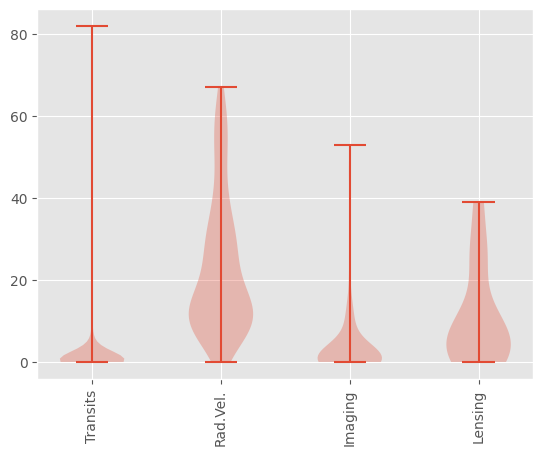

In [34]:
etiketler=["Transits","Rad.Vel.","Imaging","Lensing"]
plt.violinplot(massdist)
plt.xticks([1,2,3,4], etiketler, rotation='vertical')
plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Saçılma Grafikleri ##

Özellikle parametreler arası ilişkileri (korelasyonları) araştırmak ve görselleştirmek için kullanılmasının yanı sıra astronomide zaman serisi verinin (ışık, dikine hız eğrileri vs.) yanı sıra başka tanım kümelerindeki verileri (tayflar, tayfsal enerji dağılımları vs.) grafik etmek için sıklıkla başvurulur.

### Örnek: Karasal Gezegenler İçin Kütle Yarıçap Diyagramı ###

Ötegezegenlerin tüm çeşitliliğine karşın fizik kurallar gereği karasal gezegenler için bir kütle-yarıçap ilişkisi beklenir. Dev gaz gezegenleri çok sayıda bulunan yıldızına yakın sıcak-Jüpiterler domine ettiği ve yakınlık etkileri nedeniyle bu cisimlerin büyük bir kısmının genişlemiş atmosferlere sahip olduğu için bu ilişki ancak uzun dönemli yeterli sayıda gaz gezegen keşfedildiği vakit çalışılabilecek bir konu olarak durmaktadır ve bu parametre uzayında çeşitlilik de daha fazladır. 

Bu ilişkiyi görselleştirmek üzere yine öncelikle verinin ona göre düzenlenmesi gerekecektir. Hassas yarıçap ölçümleri ancak geçiş yöntemiyle yapılabileceği için örneklemi öncelikle geçiş yapan gezegenlerle sınırlamak; bunlar arasından da dikine hızla doğası kesinleştirilen, dolayısıyla kütlesi bilinenleri almak gerekecektir. Daha detaylı bir çalışma için yalnızca bu değerler üzerindeki belirsizliği büyük olmayan (örn. <%5), güvenilir kaynaklardan gelen veriler seçilebilir. Ancak örnek olarak `exoplanet.eu` veritabanında yarıçap ve kütlesi bulunan tüm gezegenler kullanılacaktır.

In [35]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 900x400 with 0 Axes>

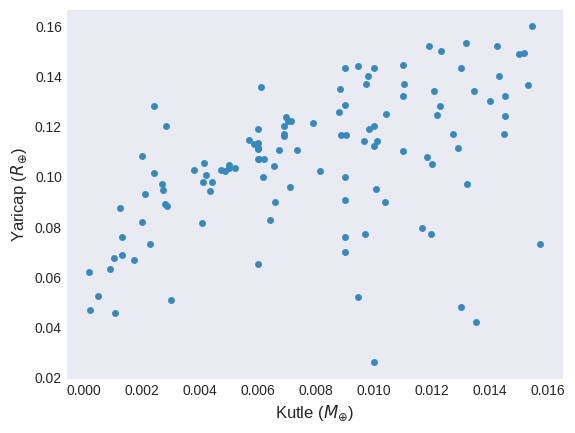

In [36]:
from astropy import constants as const
mpl.style.use("seaborn-dark")
plt.figure(figsize=(9,4))
Rjup_earth = const.R_jup / const.R_earth
Mjup_earth = const.M_jup / const.M_earth
tr_karasal = exoeu[(exoeu['detection_type'] == 'Primary Transit') & 
                   (exoeu['radius']*Rjup_earth< 1.8) &
                  (exoeu['mass']*Mjup_earth< 5.0)]
trkarasal_massrad = tr_karasal.dropna(subset=['mass','radius'])
trkarasal_massrad.plot(x="mass",y="radius",kind="scatter")
plt.xlabel("Kutle ($M_{\oplus}$)")
plt.ylabel("Yaricap ($R_{\oplus}$)")
plt.show()

İlk bakışta bir ilişki yokmuş gibi görünüyor ancak grafiğin eksenleri logaritmik ölçekte çizdirilirse daha iyi bir fikir edinmek mümkün olabilir.

<Figure size 900x400 with 0 Axes>

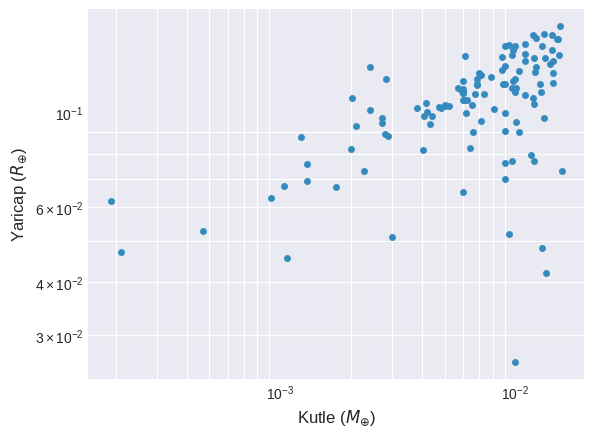

In [37]:
plt.figure(figsize=(9,4))
trkarasal_massrad.plot(x="mass",y="radius",kind="scatter")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="minor")
plt.xlabel("Kutle ($M_{\oplus}$)")
plt.ylabel("Yaricap ($R_{\oplus}$)")
plt.show()

Her ne kadar özellikle küçük kütleliler tarafında doğrusal bir ilişki görünse de kütle büyüdükçe ilişkiden ayrılan küçük yarıçaplı gezegen sayısı artmaktadır. Bu da bu gezegenlerin atmosferlerinden uçucuların ayrılmış olacağı şeklinde yorumlanabilir. Ancak böyle bir açıklamanın mutlaka fiziksel yaklaşımlarla desteklenmesi gerekir.

`seaborn` paketi saçılma grafiklerinin görselleştirilmesinde `regplot` aracılığıyla sadece bir saçılma grafiği değil aynı zamanda bir de model opsiyonu sağlar. Aynı ilişki `seaborn.replot` fonksiyonu ile görselleştirildiğinde aşağıdaki grafik elde edilebilir.

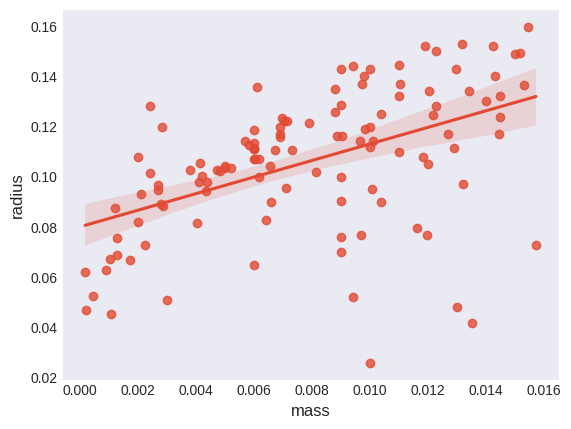

In [38]:
import seaborn as sns
sns.regplot(x='mass', y='radius', data=trkarasal_massrad)
plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Balon Diyagramları

Balon diyagramları (bubble diagrams) saçılma (scatter) grafiklerinin özel bir türüdür. Veri noktasını çizdirmek üzere kullanılacak çember (balon) büyüklüğünün bir değişken üzerinden belirlenmesiyle grafik üç boyutlu hale gelmiş olur. `pyplot.plot()` ya da `pyplot.scatter()` fonksiyonlarının sırasıyla `ms` (marker size) ve `s` (size) parametrelerine bu üçüncü boyutu belirleyecek dizi değişken geçirilerek grafiğin üçüncü boyutu belirlenir.

### Örnek: Sıcak Jüpiterler Metalce Zengin Yıldızları Sever ###

Yıldızına yakın (yörünge dönemi küçük), dolayısıyla sıcak, dev gaz gezegenlerin (sıcak-Jüpiterler) diğer gezegenlere göre metalce zengin yıldızlar etrafında daha sık bulunduğuna ilişkin bulgulara rastlanmıştır ([Osborn & Bayliss 2019](https://academic.oup.com/mnras/article/491/3/4481/5628339)). Geçiş yöntemiyle keşfedilen gezegenlerin yarıçapları hassas olarak belirlenebildiğinden kütle yerine 3. boyut olarak yarıçap kulllanılmak suretiyle grafik sadece kısa yörünge dönemli gezegenler için çizdirildiğinde bu durum açıkça görülebilir.

<IPython.core.display.Javascript object>


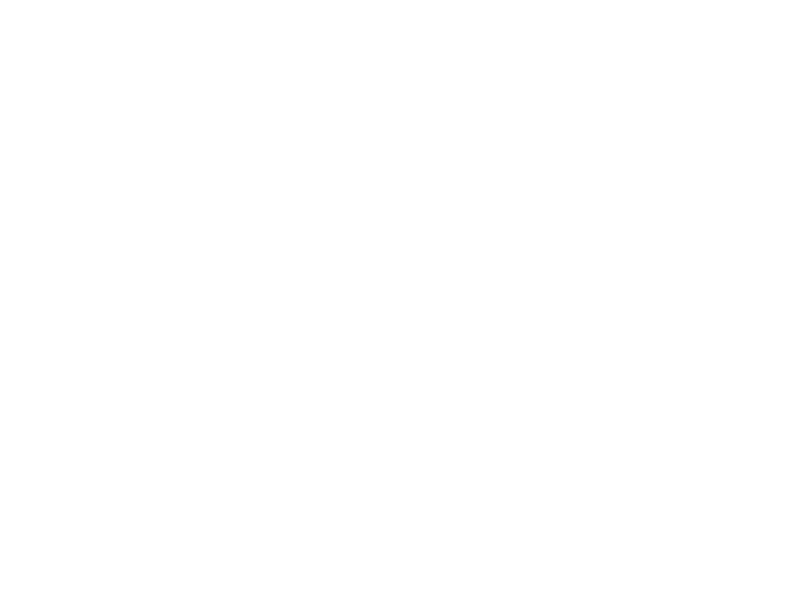

In [39]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot as plt
mpl.style.use("default")
hotpl = exoeu[(exoeu["orbital_period"] < 5) & (exoeu["mass"] < 13.)]
# Yaricapa gore sembol buyuklugu olceklendirmesi icin
# keyfi secilmis 100 carpani kullanilmistir
radii = hotpl["radius"]*100
hotpl.plot(x="orbital_period",y="star_metallicity",s=radii,kind="scatter")
plt.axhline(y=0.0,ls="--",c="red")
plt.axvline(x=0.7,ls="--",c="orange")
plt.xlabel("Yorunge Donemi (gun)")
plt.ylabel("[Fe / H] (dex)")
plt.show()

En kısa yörünge dönemli gezegenler ($P < 0.7$ gün, turuncu dik doğrunun sol tarafı) dışarıda bırakılacak olursa Güneş bolluğundan metalce daha fakir ($[Fe / H] > 0.0$, kırmızı yatay doğrunun altı) barınak yıldızlar etrafında da büyük gezegenler varsa da daha küçük gezegenlerin buradaki ağırlığı daha fazladır. Metalce zengin yıldızlar etrafında (kırmızı yatay doğrunun üstü) hem daha fazla sayıda gezegen olması, hem de bunların büyük bölümünün dev gaz gezegenler olması, geçiş yöntemiyle daha kolay keşfedilen sıcak-Jüpiter türü gezegenlerin metalce zengin yıldızları tercih ettiğini göstermektedir.

Grafiğe bir dördüncü boyut olarak barınak yıldız sıcaklığı da sembollerin gösteriminde bir renk skalası kullanılarak eklenebilir. Bu durumda sıcak gaz devlerinin metalce zengin yıldızların yanı sıra aynı zamanda sıcak yıldızları da tercih edip etmediği de denetlenmiş olur. Bunun için renk haritası (color map) parametresi `cmap` amaca uygun olarak seçilen bir [desene](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html) atanır. Gezegen barınağı yıldızlar genelde soğuk yıldızlar olduğu için `YlOrRd` yıldız renkleriyle uyumlu olması bakımından da iyi bir seçim olacaktır. Ancak, bu desende sıcaklık arttıkça renk daha kırmızı olacağı için desenin ters çevrilmesi gerekecektir. `matplotlib` renk haritalarının hepsi için terslerine karşılık gelen birer harita daha bulunmaktadır. Bu desenlere erişmek için desen isminin sonuna `_r` eklenmesi yeterli olacaktır. Örnekte bu `YlOrRd_r` 'ye karşılık gelmektedir. Örnekte yıldız renklerini daha da gerçekçi hale getirmek için (örneğin 9000 K yerine barınak yıldızlarda daha düşük bir üst limitle kısıtlamak gibi) farklı ek seçeneklere başvurulabileceği gibi renk skalalarının farklı anahtar parametre değerleriyle denemeler de yapılabilir. Yıldızların renkleri ve bu renklerin sayısallaştırılması üzerine [Harre & Heller, 2021, "Digital color codes of stars"](https://ui.adsabs.harvard.edu/abs/2021AN....342..578H/abstract) makalesi önerilebilir. Bu bilgilere uygun bir renk skalası hazırlamak da mümkündür.

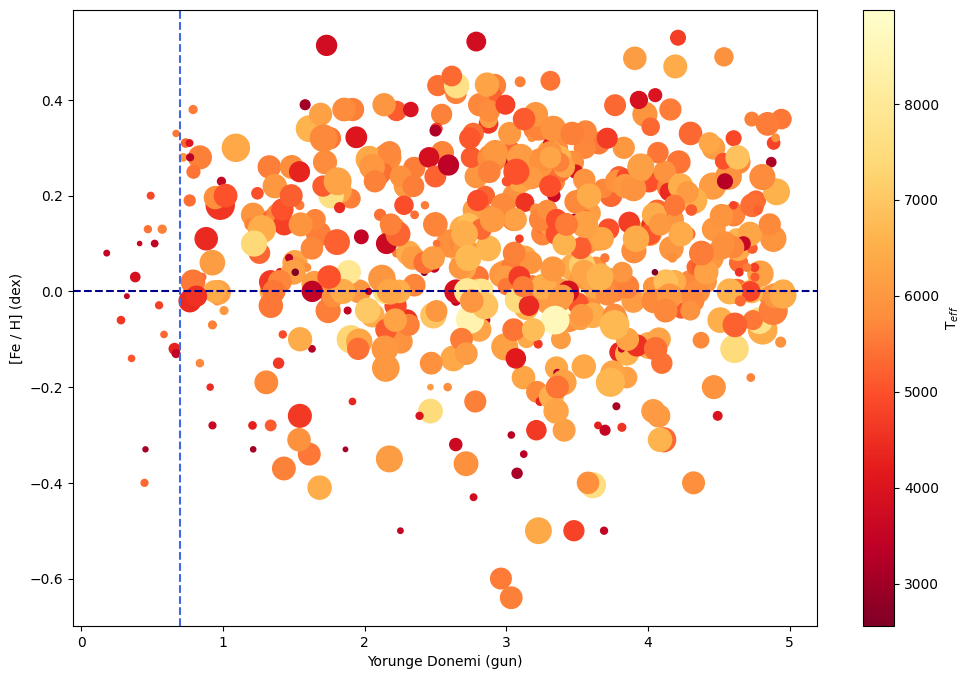

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
# Grafigin buyuklugune gore olceklendirme carpanini
# degistirmek gerekebilir
radii = hotpl["radius"]*200
plt.scatter(x=hotpl["orbital_period"],y=hotpl["star_metallicity"],s=radii, 
           c=hotpl["star_teff"], cmap="YlOrRd_r")
plt.axhline(y=0.0,ls="--",c="darkblue")
plt.axvline(x=0.7,ls="--",c="royalblue")
plt.xlabel("Yorunge Donemi (gun)")
plt.ylabel("[Fe / H] (dex)")
plt.colorbar(label="T$_{eff}$")
plt.show()

Bu grafiğe bakarak böyle bir çıkarımda bulanmak kolay görünmemektedir. Grafiğin dayalı olduğu veri setinde tüm gezegenlerin değil; belirlenen koşulları (geçiş yapan P < 5 gün yörünge dönemli gezegenler) sağlayan yörünge dönemi, yarıçapı, barınak yıldız metalisitesi ve etkin sıcaklığı veritabanında bulunan gezegenlerin bulunduğu unutulmamalıdır. 

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

## Zamana Bağlı Değişimlerin Görselleştirilmesi ##

Dikine hız, ışık eğrileri ya da gözlemsel tayflar gibi gibi astronomların sıklıkla başvurduğu zamana ya da dalgaboyuna bağlı değişimleri gösteren verilerin görselleştirlmesi için de saçılma grafikleri kullaınılabliir. Ancak genellikle gözlemsel hataların da grafik üzerine aktarılmasının beklendiği bu türden veri görselleştirmelerinde `matplotlib.errorbar()` fonksiyonu gibi buna olanak sağlayan fonksiyonlar daha sık tercih edilmektedirler.

### Örnek: Bir Geçiş Işık Eğrisi ve Modelinin Grafiği ###

HAT-P-23b ötegezegenin [Exoplanet Transit Database](http://var2.astro.cz/ETD/) açık veritabanından alınmış 123 numaralı geçiş ışık eğrisi ve bu ışık eğrisine sistemin temel parametreleri dikkate alınarak `EXOFAST` (Eastman vd. 2013, 2017) yapılmış bir geçiş ışık eğrisi modeli `veri` klasörü altında sunulmuştur. Bu ışık eğrisi ve modeli `matplotlib.errorbar` fonksiyonu kullanılarak aşağıdaki şekilde çizdirilmiştir. Gözlemsel hatalar sadece normalize göreli akıların üzerinde olduğundan hata değerleri dizisinin `yerr` parametresinden sağlanması yeterli olacaktır.

In [41]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.style.use("Solarize_Light2")
isik_egrisi = pd.read_csv("veri/hatp23_etd123_converted_datasubset.dat", delimiter="\t", 
                         index_col="#", skipinitialspace=True)
model = pd.read_csv("veri/hatp23_etd123_converted_model.dat", delimiter="\t",
                   skipinitialspace=True)

In [42]:
isik_egrisi.head()

Label       BJD-TDB    mag_dn  mag_err_dn
#                                           
1  Row_1  2.458376e+06  1.004781    0.005284
2  Row_2  2.458376e+06  1.007404    0.005298
3  Row_3  2.458376e+06  0.993975    0.005227
4  Row_4  2.458376e+06  1.006068    0.005291
5  Row_5  2.458376e+06  1.008043    0.005301

In [43]:
model.head()

#BJD-TDB      flux
0  2.458376e+06  0.999847
1  2.458376e+06  0.999847
2  2.458376e+06  0.999847
3  2.458376e+06  0.999847
4  2.458376e+06  0.999847

Gerek ışık eğrisi, gerek modelinde zaman Güneş-Yer ikilisinin kütle merkezine indirgenmiş Julien günü birimindedir (Dynamical Barycentric Julian Date, BJD-TDB). Her ne kadar ışık eğrisinde `mag_dn` ve `mag_err_dn` sütunlarında verilen değerlerin kadir (ing. magntiude) biriminde parlaklıklar olduğu düşünülebilirse de değerlerden ve modelin değerlerinden bu sütunların aslında göreli normalize akı ve hatası olduğu anlaşılmaktadır. Bir karışıklık olmaması açısından bu sütunların isimlerini değiştirmekte fayda vardır.

In [44]:
isik_egrisi.rename(columns = {'mag_dn':'normflux', 'mag_err_dn':'normflux_err'}, inplace = True)

In [45]:
isik_egrisi.head()

Label       BJD-TDB  normflux  normflux_err
#                                             
1  Row_1  2.458376e+06  1.004781      0.005284
2  Row_2  2.458376e+06  1.007404      0.005298
3  Row_3  2.458376e+06  0.993975      0.005227
4  Row_4  2.458376e+06  1.006068      0.005291
5  Row_5  2.458376e+06  1.008043      0.005301

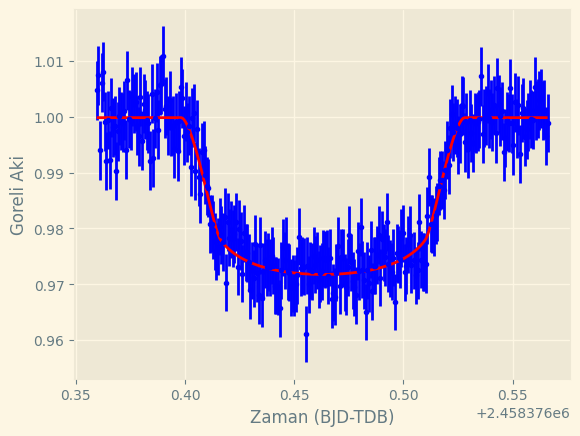

In [46]:
plt.errorbar(isik_egrisi['BJD-TDB'], isik_egrisi['normflux'], yerr=isik_egrisi['normflux_err'],
            fmt=".", color="blue")
# veri zaman sirasinda degilse grafik beklendigi gibi cizdirilmeyebilir.
model.sort_values(by="#BJD-TDB", inplace=True)
plt.plot(model["#BJD-TDB"], model["flux"], "r-", lw=2)
plt.xlabel("Zaman (BJD-TDB)")
plt.ylabel("Goreli Aki")
plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

### Örnek: Tayfsal Verinin Grafiği ###

Tayfsal verilerde genellikle gözlemsel verinin hatası bulunmaz. Buna karşılık tayfsal çizgi profilin daha iyi takip edebilmek üzere veri noktalarının doğrularla birleştirilmesi tercih edilir. Bu nedenle saçılma grafikleri yerine eğri grafikleri (line plots) tercih edilebilir. Özellikle çizgi profillerine zoom yaparak daha dar dalgaboyu aralıklarında tayfı inceleyebilmek için bu grafiği `%matplotlib notebook` arkayüzü (backend) ile çizdirmekte fayda olacaktır.

<IPython.core.display.Javascript object>


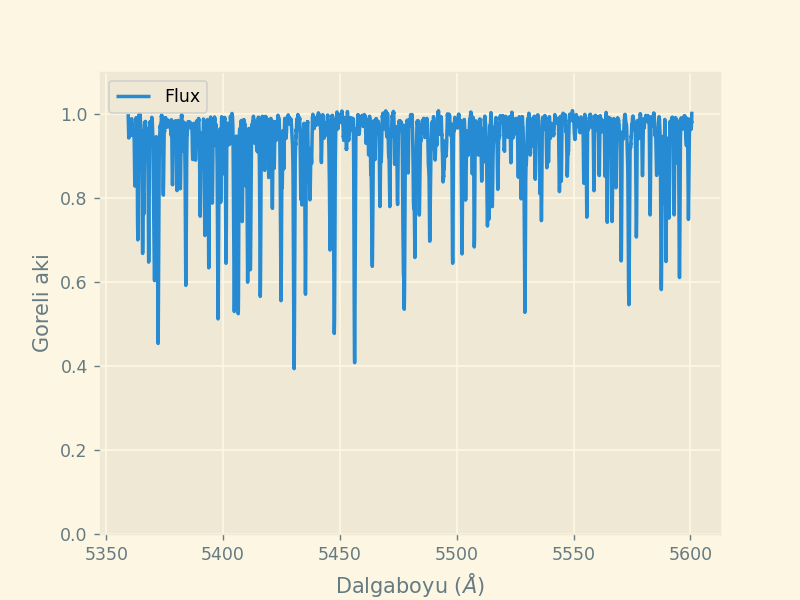

In [47]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
tayf = pd.read_csv("veri/spectrum_normalized.dat", delimiter="  ", 
                        skipinitialspace=True, engine='python')
tayf.plot(kind="line", x="Wavelength", y="Flux")
plt.ylim((0.0,1.1))
plt.xlabel("Dalgaboyu ($\AA$)")
plt.ylabel("Goreli aki")
plt.show()

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)

# Kaynaklar #

* Fundamentals of Data Visualization, Wilke, C.O., O'Reilly, 2019
* [Why Data Visualization Matters](http://www.mulinblog.com/data-visualization-matters/)
* The Why and How of Data Visualization, Daniela Huppenkothen, NYU Center for Data Science
* [matplotlib Documentation](https://matplotlib.org/)
* [pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
* [seaborn Documentation](https://seaborn.pydata.org/)
* [matplotib Temel Grafik Örnekleri](https://matplotlib.org/stable/plot_types/index.html)
* [matplotlib Grafik Galerisi](https://matplotlib.org/stable/gallery/index.html)
* [matplotlib Renk Haritaları](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)
* [Astro Plot of the Weeek (@PlotAstro) Twitter Hesabı](https://twitter.com/PlotAstro)

[Başa Dön](#Veri-Görselleştirmenin-Temelleri)